In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\deven\AppData\Local\Temp\ipykernel_17436\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [4]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [5]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\deven\AppData\Local\Temp\ipykernel_17436\411067277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


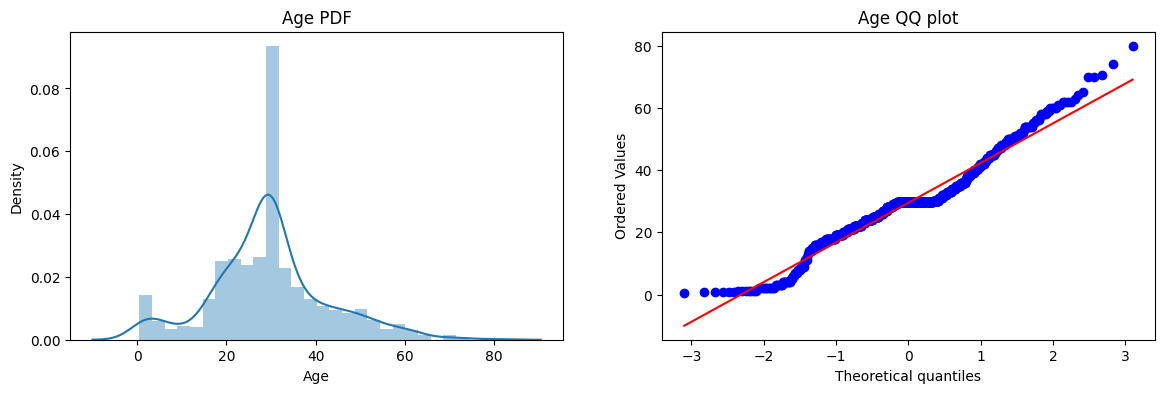

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\deven\AppData\Local\Temp\ipykernel_17436\3154615108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


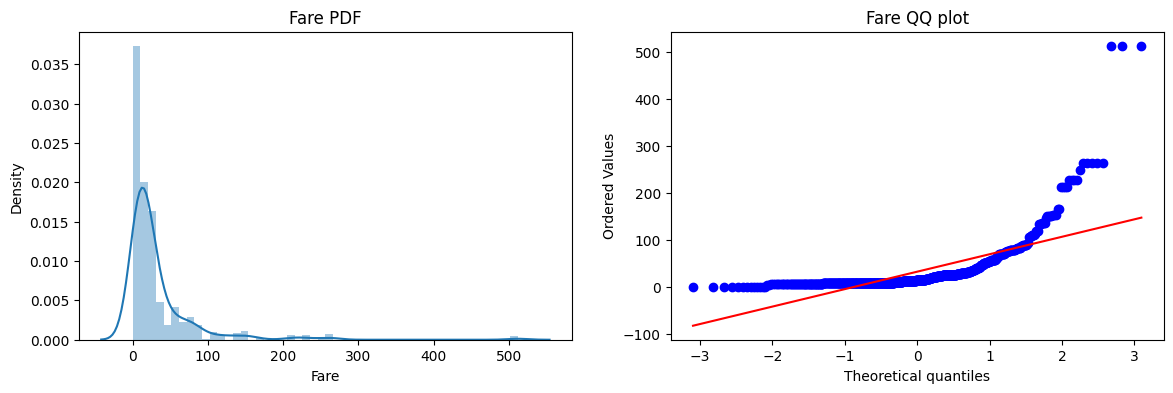

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [8]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [9]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Acuracy LR",accuracy_score(y_test,y_pred))
print("Acuracy RF",accuracy_score(y_test,y_pred2))

Acuracy LR 0.6480446927374302
Acuracy RF 0.659217877094972


In [10]:
trf = FunctionTransformer(func=np.log1p)

In [11]:
x_train_transformed = trf.fit_transform(x_train)

x_test_transformed = trf.transform(x_test)

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print("Acuracy LR",accuracy_score(y_test,y_pred))
print("Acuracy RF",accuracy_score(y_test,y_pred2))

Acuracy LR 0.6815642458100558
Acuracy RF 0.6815642458100558


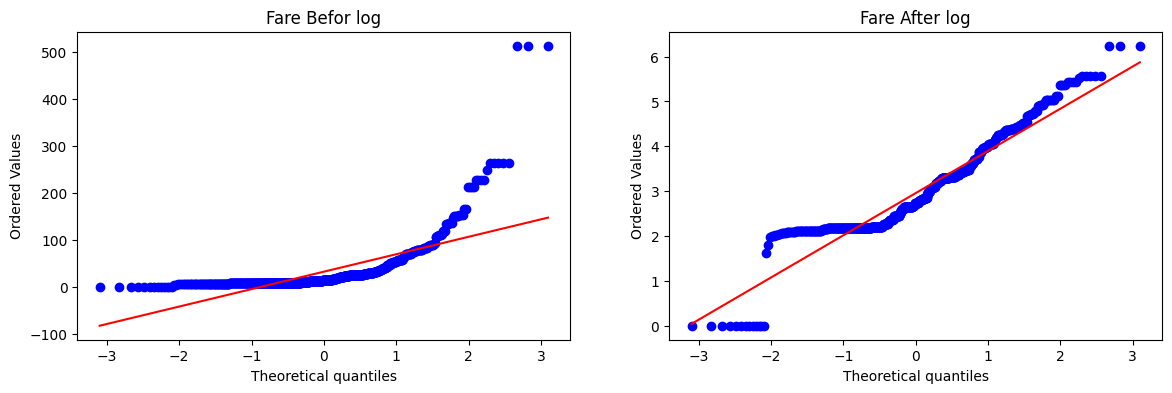

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Befor log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After log')

plt.show()

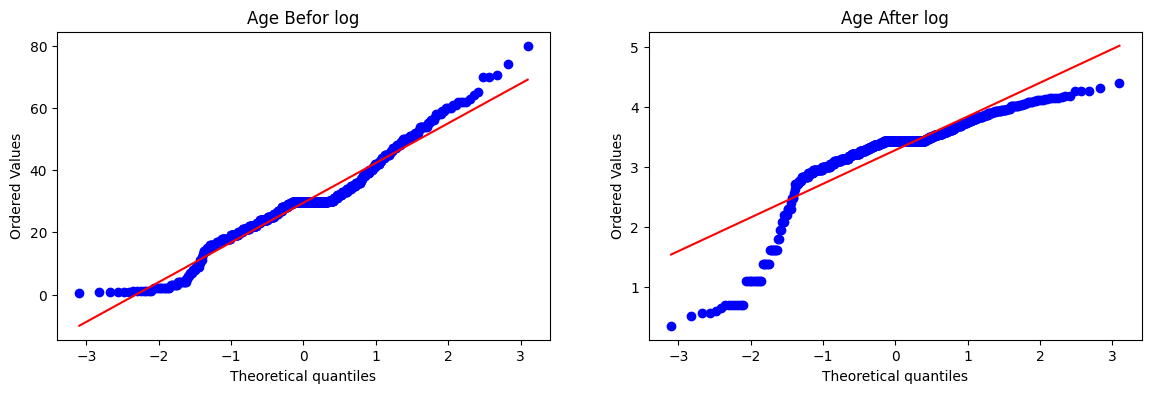

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age Befor log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After log')

plt.show() 

In [15]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("acuracy LR" , accuracy_score(y_test, y_pred))
print("acuracy DT" , accuracy_score(y_test, y_pred2))


acuracy LR 0.6703910614525139
acuracy DT 0.6815642458100558


In [17]:
x_transformed2 = trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT" ,np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6543445692883895


In [18]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title("Fare befor tranform")
    
    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare after transform")
    
    plt.show()

Accuracy 0.61729088639201


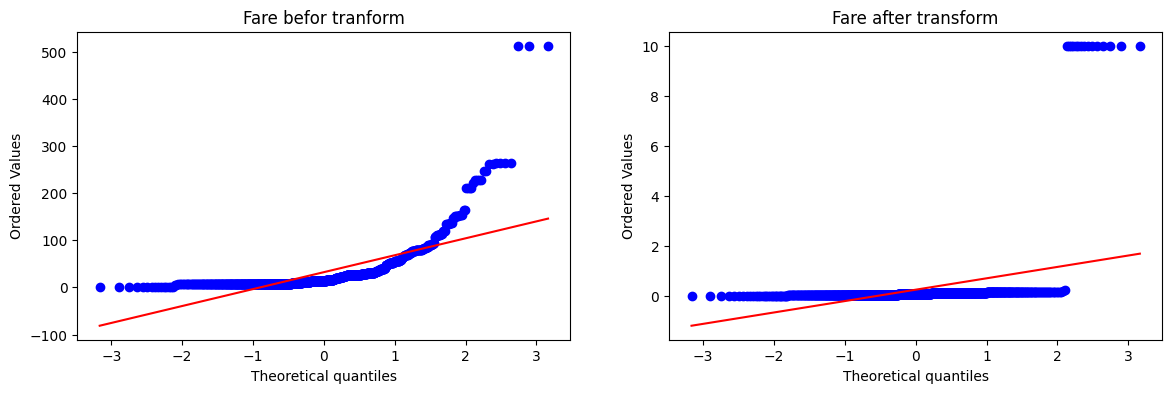

In [19]:
apply_transform(lambda x: 1/(x+0.1))